In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import warnings
warnings.filterwarnings('ignore')
plt.style.use('default')
sns.set_palette("husl")


In [3]:
df = pd.read_csv('bangladesh_students_dataset_10_lakh.csv')
df.head()

,student_id,full_name,first_name,last_name,age,gender,department,university,cgpa,credits_completed,...,email,district,is_hosteler,has_part_time_job,monthly_income,extracurricular_activities,attendance_percentage,library_visits_per_month,online_courses_enrolled,internship_experience
0,STU2024000000,করিম হোসেন,করিম,হোসেন,21,পুরুষ,মেকানিক্যাল ইঞ্জিনিয়ারিং,রাজশাহী বিশ্ববিদ্যালয়,3.45,124,...,করিম.হোসেন90@student.edu.bd,নোয়াখালী,False,True,6952,0,83.62,6,1,0
1,STU2024000001,নাজিয়া মিয়া,নাজিয়া,মিয়া,25,মহিলা,মেকানিক্যাল ইঞ্জিনিয়ারিং,শাহজালাল বিজ্ঞান ও প্রযুক্তি বিশ্ববিদ্যালয়,3.52,105,...,নাজিয়া.মিয়া715@student.edu.bd,রংপুর,False,False,15189,1,100.00,10,0,0
2,STU2024000002,রিয়াদ খান,রিয়াদ,খান,22,মহিলা,ইকোনমিক্স,জাহাঙ্গীরনগর বিশ্ববিদ্যালয়,3.08,133,...,রিয়াদ.খান550@student.edu.bd,চট্টগ্রাম,False,True,41178,2,82.66,20,2,1
3,STU2024000003,রহিম আহমেদ,রহিম,আহমেদ,20,মহিলা,ইলেকট্রিক্যাল ইঞ্জিনিয়ারিং,চট্টগ্রাম বিশ্ববিদ্যালয়,3.99,140,...,রহিম.আহমেদ465@student.edu.bd,সিলেট,True,False,28283,1,92.67,8,0,1
4,STU2024000004,নাজিয়া বেগম,নাজিয়া,বেগম,19,মহিলা,ম্যাথমেটিক্স,জাহাঙ্গীরনগর বিশ্ববিদ্যালয়,2.97,111,...,নাজিয়া.বেগম864@student.edu.bd,ঢাকা,True,True,25673,3,90.43,8,0,1


In [4]:
df.shape

(1000000, 23)

In [5]:
df.columns.tolist()

['student_id',
 'full_name',
 'first_name',
 'last_name',
 'age',
 'gender',
 'department',
 'university',
 'cgpa',
 'credits_completed',
 'semester',
 'admission_year',
 'contact_number',
 'email',
 'district',
 'is_hosteler',
 'has_part_time_job',
 'monthly_income',
 'extracurricular_activities',
 'attendance_percentage',
 'library_visits_per_month',
 'online_courses_enrolled',
 'internship_experience']

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 23 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   student_id                  1000000 non-null  object 
 1   full_name                   1000000 non-null  object 
 2   first_name                  1000000 non-null  object 
 3   last_name                   1000000 non-null  object 
 4   age                         1000000 non-null  int64  
 5   gender                      1000000 non-null  object 
 6   department                  1000000 non-null  object 
 7   university                  1000000 non-null  object 
 8   cgpa                        1000000 non-null  float64
 9   credits_completed           1000000 non-null  int64  
 10  semester                    1000000 non-null  int64  
 11  admission_year              1000000 non-null  int64  
 12  contact_number              1000000 non-null  int64  
 13

In [7]:
# টার্গেট ভেরিয়েবল তৈরি (CGPA এর উপর ভিত্তি করে পারফরম্যান্স ক্যাটাগরি)
def create_performance_category(cgpa):
    if cgpa >= 3.75:
        return 'Excellent'
    elif cgpa >= 3.25:
        return 'Good'
    elif cgpa >= 2.75:
        return 'Average'
    elif cgpa >= 2.00:
        return 'Below Average'
    else:
        return 'Poor'

df['performance_category'] = df['cgpa'].apply(create_performance_category)


print(df['performance_category'].value_counts())

performance_category
Average          353939
Good             326720
Below Average    181747
Excellent        137594
Name: count, dtype: int64


In [8]:

label_encoders = {}
categorical_columns = ['gender', 'department', 'university', 'district', 'performance_category']

for col in categorical_columns:
    le = LabelEncoder()
    df[col + '_encoded'] = le.fit_transform(df[col])
    label_encoders[col] = le
    print(f"{col} এনকোডেড - ক্লাস: {le.classes_}")

gender এনকোডেড - ক্লাস: ['পুরুষ' 'মহিলা']
department এনকোডেড - ক্লাস: ['ইকোনমিক্স' 'ইলেকট্রিক্যাল ইঞ্জিনিয়ারিং' 'কম্পিউটার সায়েন্স'
 'কেমিস্ট্রি' 'ফিজিক্স' 'বায়োলজি' 'বিজনেস স্টাডিজ'
 'মেকানিক্যাল ইঞ্জিনিয়ারিং' 'ম্যাথমেটিক্স' 'সিভিল ইঞ্জিনিয়ারিং']
university এনকোডেড - ক্লাস: ['কুমিল্লা বিশ্ববিদ্যালয়' 'খুলনা বিশ্ববিদ্যালয়'
 'চট্টগ্রাম বিশ্ববিদ্যালয়' 'জাহাঙ্গীরনগর বিশ্ববিদ্যালয়'
 'ঢাকা বিশ্ববিদ্যালয়' 'নোয়াখালী বিজ্ঞান ও প্রযুক্তি বিশ্ববিদ্যালয়'
 'বাংলাদেশ ইউনিভার্সিটি অব প্রফেশনালস' 'বুয়েট' 'রাজশাহী বিশ্ববিদ্যালয়'
 'শাহজালাল বিজ্ঞান ও প্রযুক্তি বিশ্ববিদ্যালয়']
district এনকোডেড - ক্লাস: ['কুমিল্লা' 'খুলনা' 'চট্টগ্রাম' 'ঢাকা' 'নোয়াখালী' 'বরিশাল' 'ময়মনসিংহ'
 'রংপুর' 'রাজশাহী' 'সিলেট']
performance_category এনকোডেড - ক্লাস: ['Average' 'Below Average' 'Excellent' 'Good']


In [9]:

features = [
    'age', 'gender_encoded', 'department_encoded', 'university_encoded', 
    'district_encoded', 'credits_completed', 'semester', 'admission_year',
    'is_hosteler', 'has_part_time_job', 'monthly_income', 
    'extracurricular_activities', 'attendance_percentage', 
    'library_visits_per_month', 'online_courses_enrolled', 
    'internship_experience'
]

X = df[features]
y = df['performance_category_encoded']

print(f"ফিচার শেপ: {X.shape}")
print(f"টার্গেট শেপ: {y.shape}")

ফিচার শেপ: (1000000, 16)
টার্গেট শেপ: (1000000,)


In [10]:

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"ট্রেনিং ডেটা: {X_train.shape}")
print(f"টেস্টিং ডেটা: {X_test.shape}")

ট্রেনিং ডেটা: (800000, 16)
টেস্টিং ডেটা: (200000, 16)


In [11]:
# ফিচার স্কেলিং
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"স্কেলড ট্রেনিং ডেটা: {X_train_scaled.shape}")


স্কেলড ট্রেনিং ডেটা: (800000, 16)


In [12]:

def create_ann_model(input_dim, num_classes):
    model = keras.Sequential([
        layers.Dense(128, activation='relu', input_shape=(input_dim,)),
        layers.Dropout(0.3),
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(32, activation='relu'),
        layers.Dropout(0.2),
        layers.Dense(num_classes, activation='softmax')
    ])
    
    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    
    return model

In [13]:
# মডেল প্যারামিটার
input_dim = X_train_scaled.shape[1]
num_classes = len(df['performance_category'].unique())

print(f"মডেল প্যারামিটার:")
print(f"ইনপুট ডাইমেনশন: {input_dim}")
print(f"আউটপুট ক্লাস: {num_classes}")

মডেল প্যারামিটার:
ইনপুট ডাইমেনশন: 16
আউটপুট ক্লাস: 4


In [14]:

model = create_ann_model(input_dim, num_classes)

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           2,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 4)                   │             132 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,644 (49.39 KB)

 Trainable params: 12,644 (49.39 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
history = model.fit(
    X_train_scaled, y_train,
    epochs=10,
    batch_size=512,
    validation_split=0.2,
    verbose=1
)

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 34s 18ms/step - accuracy: 0.3511 - loss: 1.3203 - val_accuracy: 0.3544 - val_loss: 1.3151
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 42s 18ms/step - accuracy: 0.3537 - loss: 1.3166 - val_accuracy: 0.3544 - val_loss: 1.3150
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 25s 20ms/step - accuracy: 0.3538 - loss: 1.3164 - val_accuracy: 0.3544 - val_loss: 1.3149
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 39s 18ms/step - accuracy: 0.3538 - loss: 1.3163 - val_accuracy: 0.3544 - val_loss: 1.3150
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 37s 14ms/step - accuracy: 0.3538 - loss: 1.3163 - val_accuracy: 0.3544 - val_loss: 1.3150
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 14ms/step - accuracy: 0.3537 - loss: 1.3162 - val_accuracy: 0.3544 - val_loss: 1.3150
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.3538 - loss: 1.3162 - val_accuracy: 0.3544 - val_loss: 1.3150
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.3537 -

In [16]:
print("মডেল ইভ্যালুয়েশন...")

train_loss, train_accuracy = model.evaluate(X_train_scaled, y_train, verbose=0)
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)

print(f"ট্রেনিং অ্যাকুরেসি: {train_accuracy:.4f}")
print(f"টেস্টিং অ্যাকুরেসি: {test_accuracy:.4f}")

মডেল ইভ্যালুয়েশন...
ট্রেনিং অ্যাকুরেসি: 0.3539
টেস্টিং অ্যাকুরেসি: 0.3539


In [17]:
# প্রেডিকশন
y_pred_proba = model.predict(X_test_scaled)
y_pred = np.argmax(y_pred_proba, axis=1)

6250/6250 ━━━━━━━━━━━━━━━━━━━━ 25s 4ms/step


In [18]:
# ক্লাসিফিকেশন রিপোর্ট
class_names = label_encoders['performance_category'].classes_
print("ক্লাসিফিকেশন রিপোর্ট:")
print(classification_report(y_test, y_pred, target_names=class_names))

ক্লাসিফিকেশন রিপোর্ট:
               precision    recall  f1-score   support

      Average       0.35      1.00      0.52     70788
Below Average       0.00      0.00      0.00     36349
    Excellent       0.00      0.00      0.00     27519
         Good       0.00      0.00      0.00     65344

     accuracy                           0.35    200000
    macro avg       0.09      0.25      0.13    200000
 weighted avg       0.13      0.35      0.19    200000



ট্রেনিং হিস্ট্রি প্লট...


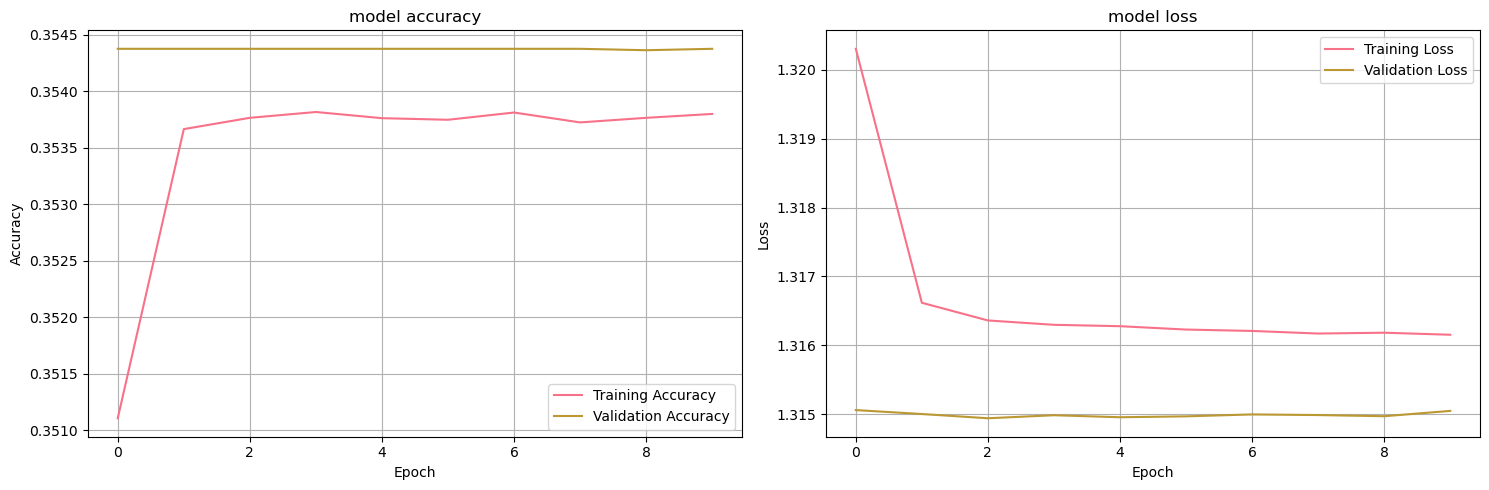

In [19]:
# ভিজুয়ালাইজেশন
def plot_training_history(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    
    # অ্যাকুরেসি প্লট
    ax1.plot(history.history['accuracy'], label='Training Accuracy')
    ax1.plot(history.history['val_accuracy'], label='Validation Accuracy')
    ax1.set_title('model accuracy')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Accuracy')
    ax1.legend()
    ax1.grid(True)
    
    # লস প্লট
    ax2.plot(history.history['loss'], label='Training Loss')
    ax2.plot(history.history['val_loss'], label='Validation Loss')
    ax2.set_title('model loss')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Loss')
    ax2.legend()
    ax2.grid(True)
    
    plt.tight_layout()
    plt.show()

print("ট্রেনিং হিস্ট্রি প্লট...")
plot_training_history(history)


কনফিউশন ম্যাট্রিক্স...


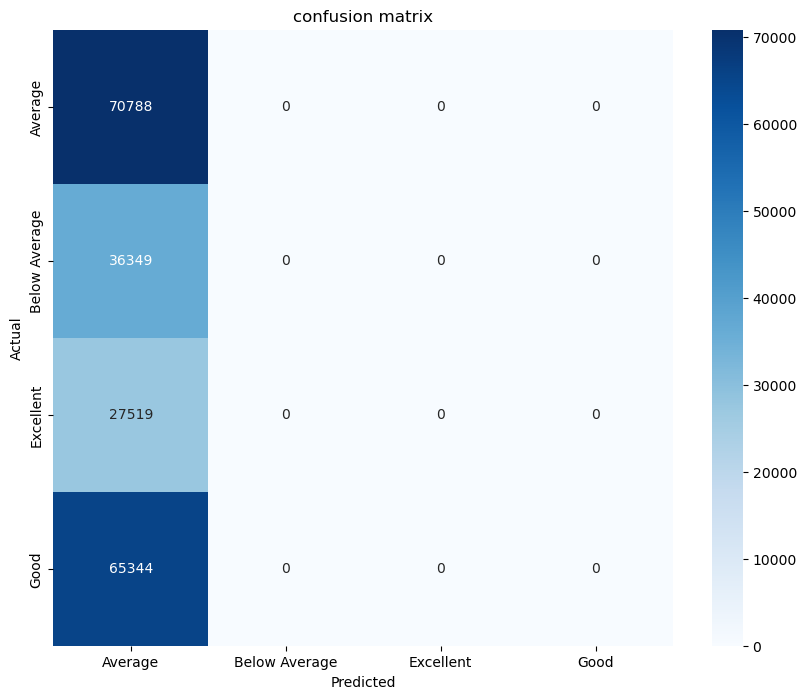

In [20]:
# কনফিউশন ম্যাট্রিক্স
def plot_confusion_matrix(y_true, y_pred, class_names):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=class_names, yticklabels=class_names)
    plt.title('confusion matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

print("কনফিউশন ম্যাট্রিক্স...")
plot_confusion_matrix(y_test, y_pred, class_names)

ফিচার ইম্পরট্যান্স...


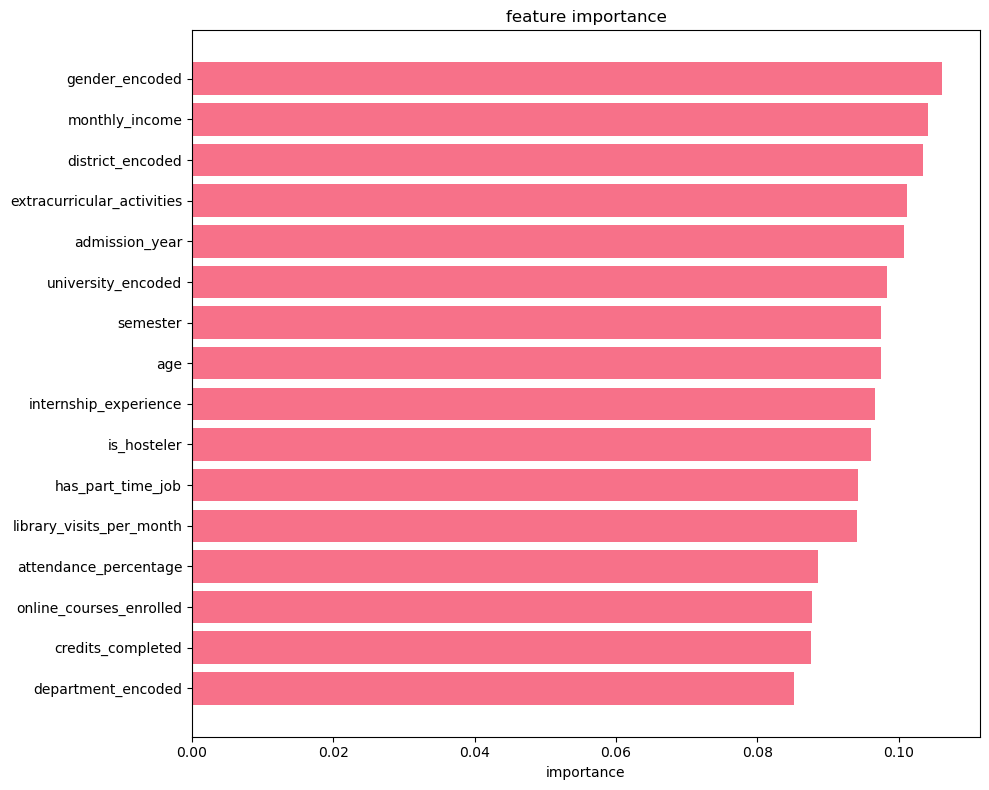

টপ ৫ গুরুত্বপূর্ণ ফিচার:
                       feature  importance
7               admission_year    0.100711
11  extracurricular_activities    0.101261
4             district_encoded    0.103473
10              monthly_income    0.104220
1               gender_encoded    0.106220


In [21]:
# ফিচার ইম্পরট্যান্স (মডেল ওয়েট এর উপর ভিত্তি করে)
def plot_feature_importance(model, feature_names):
    # প্রথম লেয়ারের ওয়েট
    weights = model.layers[0].get_weights()[0]
    importance = np.mean(np.abs(weights), axis=1)

    
    feature_imp = pd.DataFrame({
        'feature': feature_names,
        'importance': importance
    }).sort_values('importance', ascending=True)
    
    plt.figure(figsize=(10, 8))
    plt.barh(feature_imp['feature'], feature_imp['importance'])
    plt.title('feature importance')
    plt.xlabel('importance')
    plt.tight_layout()
    plt.show()
    
    return feature_imp

print("ফিচার ইম্পরট্যান্স...")
feature_importance = plot_feature_importance(model, features)
print("টপ ৫ গুরুত্বপূর্ণ ফিচার:")
print(feature_importance.tail(5))

In [22]:
# নতুন ডেটা দিয়ে প্রেডিকশন ফাংশন
def predict_student_performance(model, scaler, label_encoders, student_data):
    """
    নতুন শিক্ষার্থীর পারফরম্যান্স প্রেডিক্ট করার ফাংশন
    """
    # ইনপুট ডেটা প্রিপ্রসেস
    input_df = pd.DataFrame([student_data])
    
    # ক্যাটাগরিক্যাল ভেরিয়েবল এনকোড
    for col in ['gender', 'department', 'university', 'district']:
        le = label_encoders[col]
        input_df[col + '_encoded'] = le.transform([student_data[col]])
    
    # ফিচার সিলেক্ট
    input_features = input_df[features]
    
    # স্কেলিং
    input_scaled = scaler.transform(input_features)
    
    # প্রেডিকশন
    prediction_proba = model.predict(input_scaled)
    prediction_class = np.argmax(prediction_proba, axis=1)[0]
    
    # ক্লাস নামে কনভার্ট
    performance_le = label_encoders['performance_category']
    predicted_category = performance_le.inverse_transform([prediction_class])[0]
    
    # কনফিডেন্স
    confidence = np.max(prediction_proba)
    
    return predicted_category, confidence, prediction_proba

In [23]:
# নতুন শিক্ষার্থীর জন্য টেস্ট প্রেডিকশন
print("\nনতুন শিক্ষার্থীর পারফরম্যান্স প্রেডিকশন টেস্ট...")

test_student = {
    'age': 21,
    'gender': 'পুরুষ',
    'department': 'কম্পিউটার সায়েন্স',
    'university': 'ঢাকা বিশ্ববিদ্যালয়',
    'district': 'ঢাকা',
    'credits_completed': 90,
    'semester': 6,
    'admission_year': 2021,
    'is_hosteler': True,
    'has_part_time_job': False,
    'monthly_income': 15000,
    'extracurricular_activities': 3,
    'attendance_percentage': 92.5,
    'library_visits_per_month': 12,
    'online_courses_enrolled': 2,
    'internship_experience': 1
}

predicted_perf, confidence, probabilities = predict_student_performance(
    model, scaler, label_encoders, test_student
)

print(f"টেস্ট শিক্ষার্থীর প্রেডিক্টেড পারফরম্যান্স: {predicted_perf}")
print(f"কনফিডেন্স: {confidence:.4f}")
print(f"সমস্ত ক্লাসের প্রোবাবিলিটি:")
for i, (cls, prob) in enumerate(zip(class_names, probabilities[0])):
    print(f"  {cls}: {prob:.4f}")


নতুন শিক্ষার্থীর পারফরম্যান্স প্রেডিকশন টেস্ট...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
টেস্ট শিক্ষার্থীর প্রেডিক্টেড পারফরম্যান্স: Average
কনফিডেন্স: 0.3522
সমস্ত ক্লাসের প্রোবাবিলিটি:
  Average: 0.3522
  Below Average: 0.1841
  Excellent: 0.1405
  Good: 0.3232


In [24]:
# মডেল সেভ করা
print("মডেল সেভ করা হচ্ছে...")
model.save('student_performance_ann_model.h5')

মডেল সেভ করা হচ্ছে...


In [25]:
# প্রিপ্রসেসিং অবজেক্টস সেভ
import joblib
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(label_encoders, 'label_encoders.pkl')
joblib.dump(features, 'features.pkl')

print("মডেল এবং প্রিপ্রসেসিং অবজেক্টস সফলভাবে সেভ হয়েছে!")

মডেল এবং প্রিপ্রসেসিং অবজেক্টস সফলভাবে সেভ হয়েছে!


In [26]:

print("ফাইনাল মডেল পারফরম্যান্স রিপোর্ট")
print(f"ট্রেনিং অ্যাকুরেসি: {train_accuracy:.4f}")
print(f"টেস্টিং অ্যাকুরেসি: {test_accuracy:.4f}")
print(f"ট্রেনিং লস: {train_loss:.4f}")
print(f"টেস্টিং লস: {test_loss:.4f}")
print(f"ক্লাস সংখ্যা: {num_classes}")
print(f"ফিচার সংখ্যা: {len(features)}")
print(f"ট্রেনিং স্যাম্পল: {X_train.shape[0]:,}")
print(f"টেস্টিং স্যাম্পল: {X_test.shape[0]:,}")

ফাইনাল মডেল পারফরম্যান্স রিপোর্ট
ট্রেনিং অ্যাকুরেসি: 0.3539
টেস্টিং অ্যাকুরেসি: 0.3539
ট্রেনিং লস: 1.3159
টেস্টিং লস: 1.3160
ক্লাস সংখ্যা: 4
ফিচার সংখ্যা: 16
ট্রেনিং স্যাম্পল: 800,000
টেস্টিং স্যাম্পল: 200,000
